% packages

In [16]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader 
import seaborn as sns
from skorch import NeuralNetRegressor
from sklearn.model_selection import GridSearchCV

% data import

In [17]:
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


% visualise the model

<Axes: xlabel='wt', ylabel='mpg'>

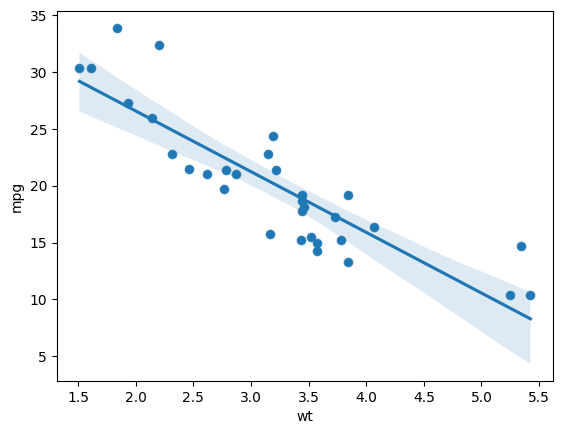

In [18]:
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

% convert data to tensor

In [19]:
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

% Dataset and Dataloader

In [20]:
class LinearRegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [21]:
train_loader = DataLoader(dataset = LinearRegressionDataset(X_np, y_np), batch_size=2)

%

In [22]:
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

In [23]:
input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)
model.train()

LinearRegressionTorch(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

%% Mean Squared Error

In [24]:
loss_fun = nn.MSELoss()

% Optimizer

In [25]:
learning_rate = 0.02
# test different values of too large 0.1 and too small 0.001
# best 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

%

In [36]:
net = NeuralNetRegressor(
    LinearRegressionTorch,
    max_epochs = 100,
    lr = learning_rate,
    iterator_train__shuffle=True
)

In [39]:
net.set_params(train_split=False, verbose=0)
params={
    "lr" : [0.02, 0.05, 0.08, 0.01],
    "max_epochs": [10, 200, 500, 1000],
}
gs = GridSearchCV(net, params, scoring="r2", cv=3, verbose=2)
gs.fit(X,y_true)

print(f"best score: {gs.best_score_}, best params: {gs.best_params_}")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.02, max_epochs=10; total time=   0.0s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.02, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.5s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.5s
[CV] END ............................lr=0.02, max_epochs=500; total time=   0.5s
[CV] END ...........................lr=0.02, max_epochs=1000; total time=   1.3s
[CV] END ...........................lr=0.02, max_epochs=1000; total time=   1.3s
[CV] END ...........................lr=0.02, max

c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


[CV] END ...........................lr=0.08, max_epochs=1000; total time=   1.2s


c:\Python311\Lib\site-packages\sklearn\metrics\_regression.py:1005: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)


[CV] END ...........................lr=0.08, max_epochs=1000; total time=   1.2s
[CV] END ...........................lr=0.08, max_epochs=1000; total time=   1.2s
[CV] END .............................lr=0.01, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.01, max_epochs=10; total time=   0.0s
[CV] END .............................lr=0.01, max_epochs=10; total time=   0.0s


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Python311\Lib\site-packages\sklearn\utils\_param_validation.py", lin

[CV] END ............................lr=0.01, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.01, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.01, max_epochs=200; total time=   0.2s
[CV] END ............................lr=0.01, max_epochs=500; total time=   0.6s
[CV] END ............................lr=0.01, max_epochs=500; total time=   0.6s
[CV] END ............................lr=0.01, max_epochs=500; total time=   0.6s
[CV] END ...........................lr=0.01, max_epochs=1000; total time=   1.2s
[CV] END ...........................lr=0.01, max_epochs=1000; total time=   1.3s
[CV] END ...........................lr=0.01, max_epochs=1000; total time=   1.4s


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [-2.55161085e+00 -4.55117559e-01  3.62549238e-01  5.70383796e-01
 -2.45852627e+00  3.64972143e-01  5.86738461e-01  5.87748772e-01
 -7.11760291e+01 -3.17088780e+19            -inf             nan
 -3.06400145e+00 -1.33434025e+00 -2.36959966e-01  3.55624135e-01]
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:990: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


best score: 0.5877487717445261, best params: {'lr': 0.05, 'max_epochs': 1000}
